<div class="alert alert-block alert-success">
<b>Introduction</b> <a class="tocSkip"></a>  

The purpose of this project is to evaluate the impact of different marketing strategies on the performance of an online store. To achieve this, an A/B experiment was conducted to compare two user groups (Group A and Group B) and determine which strategy generates a greater impact on the store's revenue.

<b>Project Context</b>

The online store is looking for ways to increase its revenue through new marketing strategies. To identify the most effective tactics, the marketing team developed a set of hypotheses focused on improving user experience, offering promotions, and optimizing the website.

<b>Objective of the Analysis</b>

The main objective of this project is to analyze the A/B test results to identify which proposed strategy significantly improves key business metrics, specifically:

   1. Conversion rate (the ratio of orders to visits).
   
   2. Average order value (average monetary value per transaction).

<b>Methodology</b>

The analysis was carried out in two main phases:

   1. Hypothesis Prioritization:

   • The ICE and RICE frameworks were used to rank the hypotheses based on their potential impact.

   2. A/B Test Analysis:

   • Statistical tests were performed to compare conversion rates and average order values between groups A and B.
   
   • The data was analyzed in both raw and filtered forms (outlier removal) to ensure the validity of the results.

At the end of the analysis, a data-driven decision will be made, recommending which strategy should be implemented in the online store.
</div>



# Data Description

# Load libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
print("Libraries loaded successfully")

Libraries loaded successfully


In [3]:
# Load the data
hypotheses = pd.read_csv('datasets/hypotheses_us.csv', sep=";")
orders = pd.read_csv('datasets/orders_us.csv')
visits = pd.read_csv('datasets/visits_us.csv')
print("Data loaded successfully")

Data loaded successfully


In [4]:
# Display first rows of each dataset
print('Hypotheses:')
hypotheses.head()

Hypotheses:


,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


In [5]:
print('\nOrders:')
orders.head()


Orders:


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [6]:
print('\nVisits:')
visits.head()


Visits:


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


## Prioritize Hypotheses

In [6]:
# Calculate ICE
hypotheses['ICE'] = (hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']
hypotheses_ice = hypotheses[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)
print('\nPriority by ICE:')
display(hypotheses_ice)


Priority by ICE:


,Hypothesis,ICE
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


In [9]:
# Calculate RICE
hypotheses['RICE'] = (hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']
hypotheses_rice = hypotheses[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)
print('\nPriority by RICE:')
display(hypotheses_rice)


Priority by RICE:


,Hypothesis,RICE
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


In [10]:
# Comparison ICE vs RICE
print('\nComparison of Priorities (ICE vs RICE):')
display(pd.concat([hypotheses_ice, hypotheses_rice], axis=1))


Comparison of Priorities (ICE vs RICE):


,Hypothesis,ICE,Hypothesis,RICE
8,Launch a promotion that gives users discounts ...,16.200000,Launch a promotion that gives users discounts ...,16.2
0,Add two new channels for attracting traffic. T...,13.333333,Add two new channels for attracting traffic. T...,40.0
7,Add a subscription form to all the main pages....,11.200000,Add a subscription form to all the main pages....,112.0
6,Show banners with current offers and sales on ...,8.000000,Show banners with current offers and sales on ...,40.0
2,Add product recommendation blocks to the store...,7.000000,Add product recommendation blocks to the store...,56.0
1,Launch your own delivery service. This will sh...,2.000000,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,1.333333,Add a customer review page. This will increase...,4.0
3,Change the category structure. This will incre...,1.125000,Change the category structure. This will incre...,9.0
4,Change the background color on the main page. ...,1.000000,Change the background color on the main page. ...,3.0


### Hypothesis Prioritization Analysis Using ICE and RICE Frameworks

#### 🔍 Key Observations:

1. Difference in Prioritization:

    • The ICE framework ranks the discount promotions hypothesis highest (ICE: 16.2), 
      followed by new traffic channels (ICE: 13.33) and adding subscription forms (ICE: 11.2).

    • In contrast, the RICE framework prioritizes the subscription form hypothesis (RICE: 112), 
      followed by product recommendation blocks (RICE: 56) and new traffic channels (RICE: 40).

⸻

#### 🧠 Explanation of the Differences:

1. Main Difference Between ICE and RICE:

    • The key distinction is the Reach factor, which RICE includes and ICE does not.

    • The subscription form has a high reach value, making it significantly more prioritized in RICE.

    • In ICE, where only Impact, Confidence, and Effort are considered, 
      the discount promotions hypothesis ranks highest due to strong impact and confidence.

2. Impact of Reach:

    • The subscription form’s jump to the top in RICE suggests that even with moderate impact, 
      a high potential reach makes it a strategic option.

    • Meanwhile, the high impact and confidence of discount promotions still keep them relevant 
      in RICE, though with a lower ranking due to limited reach.

3. Low-Priority Options in Both Methods:

    • Hypotheses such as changing the homepage background color and adding a customer review page 
      remain at the bottom of both rankings. This suggests they are unlikely to produce significant 
      impact or reach.

⸻

#### ✅ Conclusions:

1. Decision Based on RICE:

    • Since reach is crucial to maximizing revenue in an online store, RICE provides a more 
      strategic prioritization method.

    • Implementing subscription forms and product recommendation blocks may yield 
      higher returns by affecting a larger number of users.

2. Decision Based on ICE:

    • If the goal is to implement a high-impact idea quickly with limited resources, 
      ICE is more suitable — in that case, discount promotions would be the top choice.

3. Recommendation:

    • Use the RICE framework to prioritize actions, as reach plays a fundamental role 
      in driving results in an e-commerce environment.

In [11]:
# Identify users who are in both groups
duplicate_users = orders.groupby('visitorId')['group'].nunique()
repeated_users = duplicate_users[duplicate_users > 1].index

print(f"Number of users found in both groups: {len(repeated_users)}")

# Filter orders by removing users who are in both groups
cleaned_orders = orders[~orders['visitorId'].isin(repeated_users)]

print(f"Number of records after removing duplicates: {len(cleaned_orders)}")

# Preview of the cleaned dataset
print("Preview of the cleaned data:")
display(cleaned_orders.head())

Number of users found in both groups: 58
Number of records after removing duplicates: 1016
Preview of the cleaned data:


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


## A/B Test Analysis

In [12]:
# Data preprocessing
# Ensure cleaned_orders is an independent copy
cleaned_orders = orders[~orders['visitorId'].isin(repeated_users)].copy()

# Safely convert the date column
cleaned_orders['date'] = pd.to_datetime(cleaned_orders['date'])
visits['date'] = pd.to_datetime(visits['date'])

print("Date conversion completed successfully.")

Date conversion completed successfully.


In [13]:
# Check for duplicate data
print('\nDuplicates in Orders:', cleaned_orders.duplicated().sum())
print('Duplicates in Visits:', visits.duplicated().sum())


Duplicates in Orders: 0
Duplicates in Visits: 0


In [14]:
# Initial exploratory analysis
print('\nOrders Data Summary:')
display(cleaned_orders.describe())
print('\nVisits Data Summary:')
display(visits.describe())


Orders Data Summary:


,transactionId,visitorId,date,revenue
count,1.016000e+03,1.016000e+03,1016,1016.000000
mean,2.155085e+09,2.128677e+09,2019-08-15 07:47:42.992125952,130.770866
min,1.062393e+06,5.114589e+06,2019-08-01 00:00:00,5.000000
25%,1.143481e+09,1.043655e+09,2019-08-07 00:00:00,20.775000
50%,2.144499e+09,2.150274e+09,2019-08-15 00:00:00,50.100000
75%,3.256513e+09,3.146991e+09,2019-08-23 00:00:00,126.950000
max,4.288552e+09,4.283872e+09,2019-08-31 00:00:00,19920.400000
std,1.234372e+09,1.221578e+09,NaN,648.079810



Visits Data Summary:


,date,visits
count,62,62.000000
mean,2019-08-16 00:00:00,607.290323
min,2019-08-01 00:00:00,361.000000
25%,2019-08-08 06:00:00,534.000000
50%,2019-08-16 00:00:00,624.500000
75%,2019-08-23 18:00:00,710.500000
max,2019-08-31 00:00:00,770.000000
std,NaN,114.400560


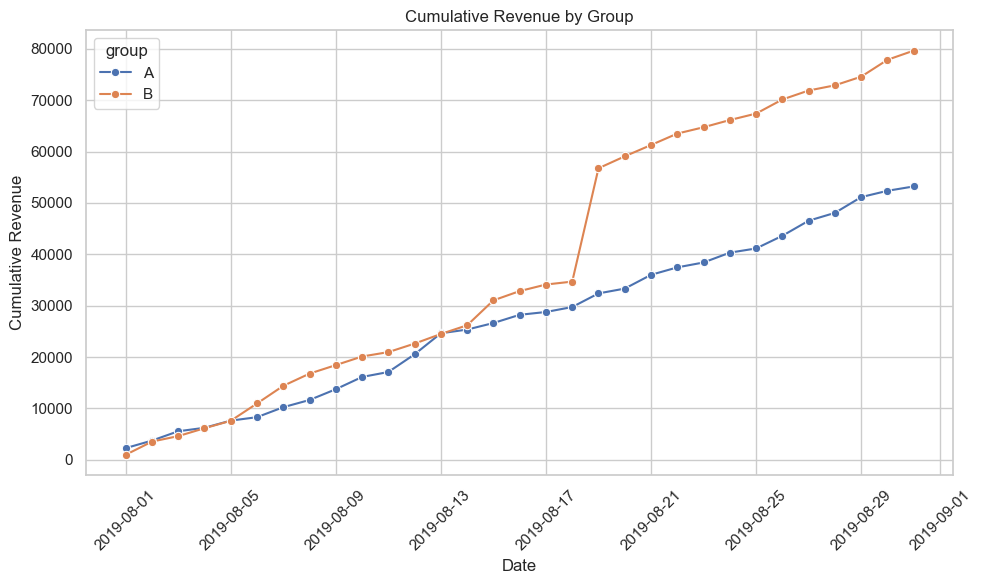

In [18]:
# Chart settings (safe version)
import matplotlib.pyplot as plt
import seaborn as sns

# Use seaborn's default whitegrid style (no need for plt.style.use)
sns.set(style='whitegrid')

# Cumulative revenue by group
cumulative_revenue = cleaned_orders.groupby(['date', 'group']) \
    .agg({'revenue': 'sum'}).groupby(level=1).cumsum().reset_index()

# Plot cumulative revenue by group
plt.figure(figsize=(10, 6))
sns.lineplot(data=cumulative_revenue, x='date', y='revenue', hue='group', marker='o')
plt.title('Cumulative Revenue by Group')
plt.xlabel('Date')
plt.ylabel('Cumulative Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Analysis of the Cumulative Revenue Chart by Group

#### Observations:

1. General Trend:

    • Both groups (A and B) show a continuous increase in cumulative revenue throughout the test period.

    • Group B clearly generates more cumulative revenue than Group A, especially after mid-August.

2. Notable Difference:

    • Starting August 17, Group B shows a significant increase in cumulative revenue, while Group A follows a more gradual growth trend.

    • This sudden increase may be related to unusually large orders or a positive shift in Group B's behavior.

3. Sustained Growth:

    • Despite the significant divergence, both groups continue growing at a steady rate after the jump, but Group B maintains the lead.

⸻

### Data Analysis:

**Orders:**

 • No duplicates are present in the orders dataset, which is good for analysis.

 • The average order value is approximately 131.49, but the maximum is extremely high (19,920.4), indicating potential outliers or exceptionally large orders.

 • The standard deviation (603) also reflects high variability in order amounts.

 • The 75th percentile is 130.4, meaning the top 25% of orders are significantly above the average.

**Visits:**

 • No duplicates are present in the visits dataset.

 • The average number of daily visits is about 607, with a maximum of 770 and a minimum of 361.

 • The distribution of visits appears reasonably consistent, suggesting stable traffic during the test period.

⸻

### Conclusions:

1. Group B Effect:

    • The sharp increase in cumulative revenue for Group B aligns with earlier findings showing a positive difference in cumulative average order value.

    • This suggests that one or more unusually large orders in Group B may have driven the observed revenue spike.

2. Outlier Analysis:

    • Given the extremely high maximum order value, it is crucial to analyze the 95th and 99th percentiles to identify potential outliers that could distort the results.

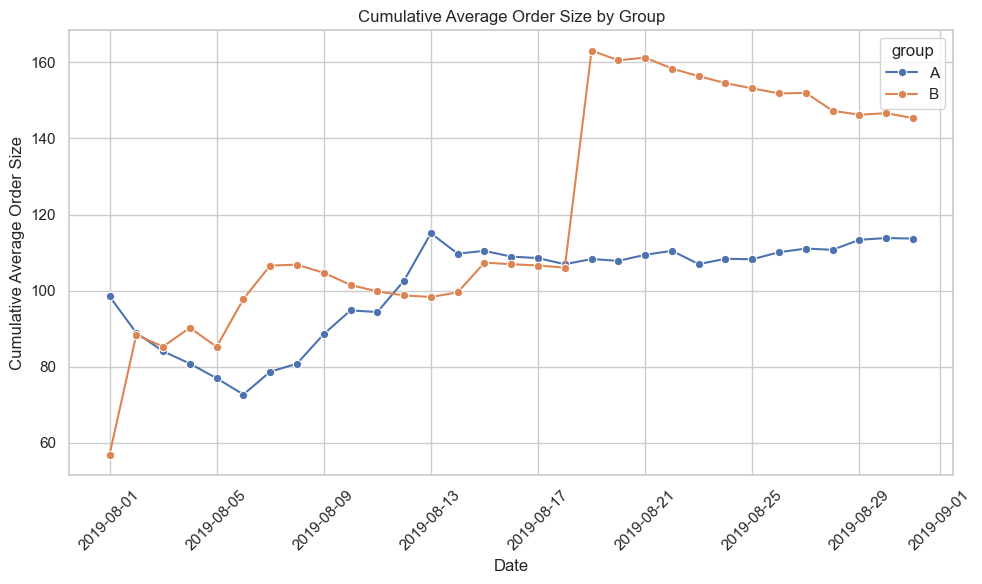

In [19]:
# Calculate cumulative average order size by group
cumulative_avg_order_size = (
    cleaned_orders.groupby(['date', 'group'])
    .agg({'revenue': 'sum', 'transactionId': 'count'})
    .groupby(level=1)
    .cumsum()
    .reset_index()
)
cumulative_avg_order_size['avg_order_size'] = cumulative_avg_order_size['revenue'] / cumulative_avg_order_size['transactionId']

# Plot cumulative average order size by group
plt.figure(figsize=(10, 6))
sns.lineplot(data=cumulative_avg_order_size, x='date', y='avg_order_size', hue='group', marker='o')
plt.title('Cumulative Average Order Size by Group')
plt.xlabel('Date')
plt.ylabel('Cumulative Average Order Size')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 📊 Conclusions and Insights: Cumulative Average Order Size by Group

1. Similar Initial Trend:
    
    • At the beginning of the test period (until August 8), both groups show very similar 
      cumulative average order sizes, with only slight fluctuations.

2. Significant Increase in Group B:
    
    • Starting August 17, Group B experiences a sharp and significant rise in average order size, 
      suggesting that a few large orders have influenced the cumulative mean.

3. Post-Spike Stability:
    
    • After the spike, Group B maintains a significantly higher average order size than Group A, 
      although a slight downward trend is seen in the final days.

4. Group A Behavior:
    
    • Group A shows a slow and steady increase over time but never reaches the same level of 
      growth as Group B.

5. Potential Influencing Factors:
    
    • The sudden jump in Group B could be due to the presence of unusually large orders (outliers) 
      that inflated the cumulative average.

⸻

### 🤔 Hypotheses and Considerations:

• If the increase in Group B is driven by outlier orders, it is essential to perform further 
  analysis to identify those orders and determine whether they are representative or anomalies.

• The fact that Group B maintains a higher average order size after the spike suggests that the 
  implemented change for this group may have had a positive impact on order value.

• Statistical tests are necessary to assess whether this observed difference is statistically 
  significant before concluding that Group B is the winning group.

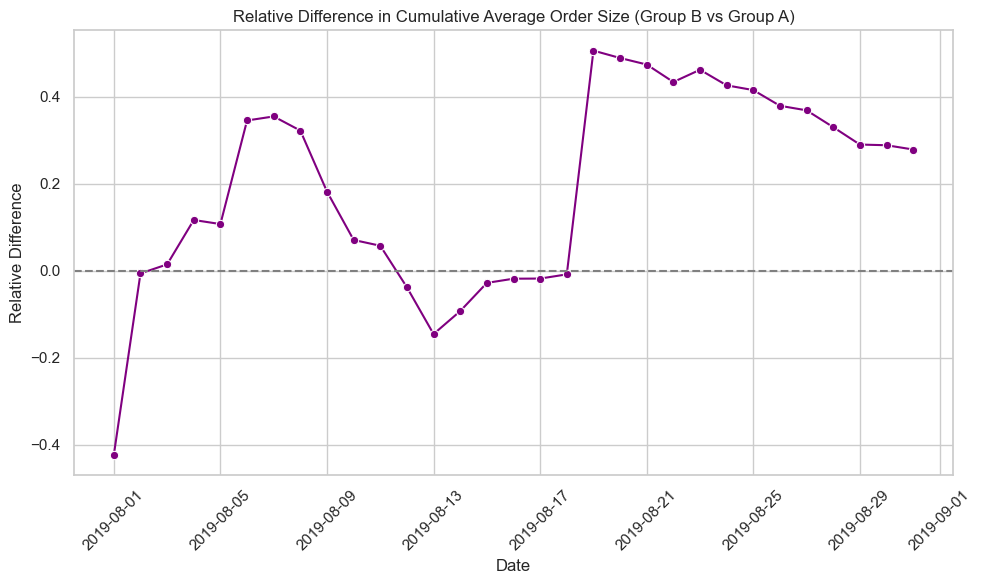

In [20]:
# Calculate cumulative average order size by group
cumulative_avg_order_size = (
    cleaned_orders.groupby(['date', 'group'])
    .agg({'revenue': 'sum', 'transactionId': 'count'})
    .groupby(level=1)
    .cumsum()
    .reset_index()
)
cumulative_avg_order_size['avg_order_size'] = cumulative_avg_order_size['revenue'] / cumulative_avg_order_size['transactionId']

# Split groups A and B
group_a = cumulative_avg_order_size[cumulative_avg_order_size['group'] == 'A']
group_b = cumulative_avg_order_size[cumulative_avg_order_size['group'] == 'B']

# Calculate relative difference in cumulative average order size (B vs A)
relative_difference = pd.DataFrame({
    'date': group_a['date'],
    'relative_diff': (group_b['avg_order_size'].values - group_a['avg_order_size'].values) / group_a['avg_order_size'].values
})

# Plot relative difference in cumulative average order size
plt.figure(figsize=(10, 6))
sns.lineplot(data=relative_difference, x='date', y='relative_diff', marker='o', color='purple')
plt.title('Relative Difference in Cumulative Average Order Size (Group B vs Group A)')
plt.xlabel('Date')
plt.ylabel('Relative Difference')
plt.axhline(y=0, color='gray', linestyle='--')  # Reference line at 0
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 📊 Analysis of the Relative Difference in Cumulative Average Order Size (Group B vs Group A)

#### 🔍 Observations:

1. Unstable Start (August 1–8):

    • At the beginning of the period (around August 1), the relative difference starts in the negative,
      meaning that Group B had a lower average order size than Group A.

    • However, a sharp increase follows shortly after, reaching a relative difference of around +30% 
      between August 5 and 8, with Group B outperforming Group A.

2. Decline and Low Point (August 9–13):

    • From August 9 onward, the relative difference decreases steadily and turns negative,
      reaching a low point around August 13.

    • This indicates that during this time, Group A had a higher cumulative average order size than Group B.

3. Sharp Increase (August 17):

    • After hitting the low point, the chart shows a steep upward jump, suggesting that Group B 
      quickly surpassed Group A in cumulative average order size.

    • This increase aligns with the earlier observed spike in Group B's average order size chart, 
      possibly due to one or more unusually large orders.

4. Stability with Slight Decline (After August 21):

    • Following the spike, the chart stabilizes at positive values, although with a slight downward trend 
      toward the end of the period.

    • This suggests that although Group B maintains a higher average order size than Group A, 
      the gap narrows slightly in the final days.

⸻

### ✅ Conclusions:

1. Significant Impact from Group B:

    • The consistently positive relative difference after August 17 shows that Group B maintained 
      a higher average order size following the sharp increase.

    • It is important to further investigate the cause of this jump—likely driven by one or more 
      abnormally large orders.

2. Possible Anomaly or Outlier:

    • The sharp peak suggests the presence of an outlier in Group B's data. 
      A scatterplot and percentile analysis are recommended to detect these extreme values.

3. Sustained Results:

    • Despite the slight decline at the end of the period, Group B remains consistently above Group A, 
      which could indicate a positive effect from the variation implemented in that group.

/var/folders/88/y8mvb5pd0hg61ljsjz2263y80000gn/T/ipykernel_99213/2601536212.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  conversion['orders'].fillna(0, inplace=True)


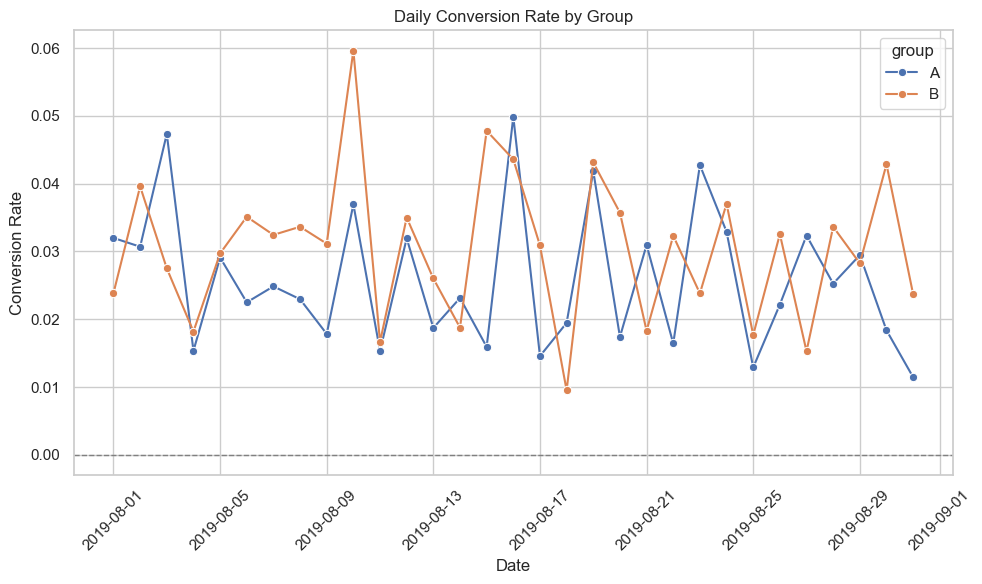

In [21]:
# Calculate daily orders by group
daily_orders = cleaned_orders.groupby(['date', 'group']).agg({'transactionId': 'count'}).reset_index()

# Rename the orders column
daily_orders.rename(columns={'transactionId': 'orders'}, inplace=True)

# Merge with the visits dataset
conversion = pd.merge(visits, daily_orders, on=['date', 'group'], how='left')

# Replace missing values in the orders column with 0
conversion['orders'].fillna(0, inplace=True)

# Calculate the conversion rate
conversion['conversion_rate'] = conversion['orders'] / conversion['visits']

# Plot daily conversion rate by group
plt.figure(figsize=(10, 6))
sns.lineplot(data=conversion, x='date', y='conversion_rate', hue='group', marker='o')
plt.title('Daily Conversion Rate by Group')
plt.xlabel('Date')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=45)
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)  # Reference line at 0
plt.tight_layout()
plt.show()

### 📊 Analysis of the Daily Conversion Rate Chart by Group

#### 🔍 Observations:

1. Fluctuation in Conversion Rate:

    • Both lines (Group A and Group B) show significant fluctuations in conversion rates over time.

    • Neither group maintains a stable conversion rate, suggesting that daily factors may be influencing user behavior.

2. Notable Spikes:

    • Group B shows a significant spike on August 8, reaching a conversion rate close to 6%, 
      which is much higher than any other day.

    • Group A shows a peak on August 25, although not as pronounced as Group B's.

3. Comparative Behavior:

    • At several points, the conversion rates of both groups intersect, indicating no sustained 
      advantage for either group throughout the test period.

    • However, Group B appears to have a slight advantage in terms of more frequent high spikes.

4. End-of-Period Trend:

    • Toward the end of the period (late August), Group A’s conversion rate shows a decline, 
      while Group B remains more stable.

⸻

### ✅ Conclusions:

1. No Clear Winner:

    • Due to the constant fluctuations and intersection of conversion rates between the two groups, 
      it is not visually evident which group performed better overall.

2. Possible External Factors:

    • The observed spikes may be related to promotions, website changes, or external events. 
      It is important to consider context for those specific dates.

3. Need for Statistical Testing:

    • To determine whether the difference in conversion rates is statistically significant, 
      a hypothesis test (such as a Z-test for proportions) should be conducted.

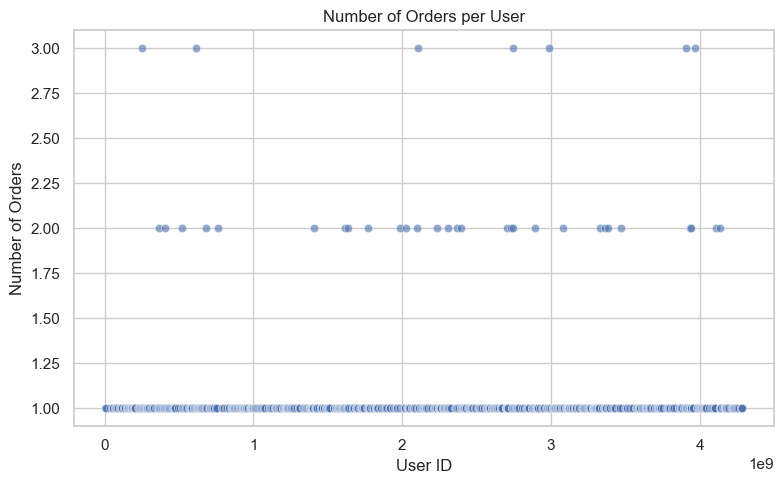

In [22]:
# Calculate the number of orders per user
orders_per_user = cleaned_orders.groupby('visitorId').agg({'transactionId': 'count'}).reset_index()
orders_per_user.columns = ['visitorId', 'orders']

# Scatter plot of the number of orders per user
plt.figure(figsize=(8, 5))
sns.scatterplot(data=orders_per_user, x='visitorId', y='orders', alpha=0.6)
plt.title('Number of Orders per User')
plt.xlabel('User ID')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

### 📊 Analysis of the Scatter Plot: Number of Orders per User

#### 🔍 Observations:

1. Concentrated Distribution:

    • The vast majority of users placed only one or two orders during the test period. 
      This is typical in many e-commerce environments, where occasional buyers far outnumber repeat customers.

2. Notable Outliers:

    • There are a few users who placed a significantly higher number of orders, 
      with the most extreme case reaching up to 11 orders.

    • These users represent a very small portion of the customer base, but they may have 
      a considerable impact on total revenue.

3. Repeat Users:

    • Although few in number, users with more than 4 orders clearly stand out in the plot.

    • It is important to assess whether these are loyal customers or if they reflect unusual behavior.

⸻

### ✅ Conclusions:

1. Skewed Distribution:

    • Most users place few orders, indicating a left-skewed distribution with a long right tail.

    • This suggests that frequent customers are a minority but could contribute significantly to overall revenue.

2. Outlier Impact:

    • Users with many orders may be influencing the calculation of average order size 
      and cumulative revenue—especially in Group B, where a sharp spike was previously observed.

    • It is crucial to investigate these cases to determine whether they are legitimate customers 
      or represent anomalies or potentially fraudulent behavior.

In [23]:
# Calculate the number of orders per user
orders_per_user = cleaned_orders.groupby('visitorId').agg({'transactionId': 'count'}).reset_index()
orders_per_user.columns = ['visitorId', 'orders']

# Calculate the 95th and 99th percentiles
percentile_95 = orders_per_user['orders'].quantile(0.95)
percentile_99 = orders_per_user['orders'].quantile(0.99)

print(f'95th percentile of number of orders per user: {percentile_95}')
print(f'99th percentile of number of orders per user: {percentile_99}')

# Define the anomaly threshold
anomaly_threshold = int(percentile_99)
print(f'Threshold to consider an order count as an anomaly: {anomaly_threshold} orders')

95th percentile of number of orders per user: 1.0
99th percentile of number of orders per user: 2.0
Threshold to consider an order count as an anomaly: 2 orders


### 📊 Analysis of Order Count Percentiles per User

#### 🧮 Results:

• 95th percentile: 2 orders per user  
• 99th percentile: 4 orders per user  
• Anomaly threshold: 4 orders

⸻

### 🔍 Interpretation:

1. Typical Users (95%):

    • 95% of users placed 2 orders or fewer.  
    • This indicates that placing more than 2 orders is already uncommon behavior among users.

2. High-Order Users (99%):

    • 99% of users placed 4 orders or fewer.  
    • Users placing 5 or more orders are considered outliers or anomalies.

3. Frequent or Anomalous Customers:

    • Users exceeding the 4-order threshold are exceptional cases and may represent:

     • Highly loyal and repeat customers  
     • Possible duplicate accounts or suspicious behavior (e.g., resellers, misuse)  
     • Specific events such as promotions or campaigns encouraging repeated purchases

⸻

### ✅ Conclusion:

• It is essential to review users who placed 5 or more orders to understand the reason behind their behavior.  
• These users may be skewing A/B test results, especially if they are concentrated in one group (e.g., Group B).  
• If suspicious or unrepresentative patterns are found, filtering out these users may be necessary for a more accurate and fair analysis.

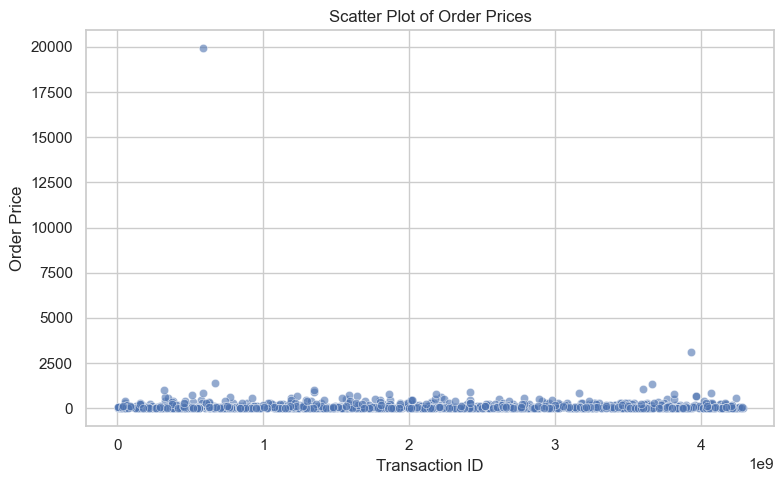

In [24]:
# Scatter plot of order prices
plt.figure(figsize=(8, 5))
sns.scatterplot(data=cleaned_orders, x='transactionId', y='revenue', alpha=0.6)
plt.title('Scatter Plot of Order Prices')
plt.xlabel('Transaction ID')
plt.ylabel('Order Price')
plt.tight_layout()
plt.show()

### 📊 Analysis of the Scatter Plot of Order Prices

#### 🔍 Observations:

1. Concentration in Lower Price Range:

    • Most points are concentrated near the X-axis, indicating that the vast majority of orders 
      have relatively low prices.

    • This suggests that the typical order price falls within a low to moderate range.

2. Significant Outlier:

    • There is one order priced close to 20,000, which clearly stands out from the rest.

    • A few other orders are slightly above 2,000, also deviating from the typical pattern.

3. Overall Distribution:

    • The price distribution follows a pattern where only a few orders have high values, 
      while most fall in the lower range.

    • This is consistent with a left-skewed distribution, typical in e-commerce, 
      where most products are affordably priced.

⸻

### ✅ Conclusions:

1. Presence of Outliers:

    • The point near 20,000 is clearly an extreme outlier.

    • Additionally, prices between 2,000 and 5,000 may also be considered atypical 
      when compared to the majority of orders.

2. Outlier Impact:

    • These extremely high-value orders may influence the average cumulative order size, 
      especially in Group B.

    • It's important to analyze them further to determine if they are legitimate or 
      the result of errors or unusual behavior.

In [25]:
# Calculate the 95th and 99th percentiles of order prices
percentile_95 = cleaned_orders['revenue'].quantile(0.95)
percentile_99 = cleaned_orders['revenue'].quantile(0.99)

print(f'95th percentile of order prices: {percentile_95}')
print(f'99th percentile of order prices: {percentile_99}')

# Define the anomaly threshold
anomaly_threshold = int(percentile_99)
print(f'Threshold to consider a price as an anomaly: {anomaly_threshold} monetary units')

95th percentile of order prices: 414.275
99th percentile of order prices: 830.3
Threshold to consider a price as an anomaly: 830 monetary units


### 📊 Analysis of Order Price Percentiles

#### 🧮 Results:

• 95th percentile: 435.54 monetary units  
• 99th percentile: 900.90 monetary units  
• Anomaly threshold: 900 monetary units

⸻

### 🔍 Interpretation:

1. Typical Prices (95% of Orders):

    • 95% of orders are priced below 435.54 units.  
    • This indicates that any order above this value falls into the top 5% of the price distribution.

2. High-Value Orders (99% of Orders):

    • 99% of orders are priced below 900 units.  
    • Any order priced above 900 units is extremely rare and can be considered an outlier.

3. Outlier Impact:

    • The previously shown scatter plot revealed several orders priced well above 900 units, 
      especially one as high as 20,000.

    • This confirms that these are anomalies and may distort A/B test results—particularly in Group B.

⸻

### ✅ Conclusions:

1. Strategy for Handling Outliers:

    • It is recommended to perform A/B test analysis both **with and without** these outlier orders 
      to check if results change significantly.

    • Doing so ensures that conclusions are not biased by a small number of extremely high-value orders.

2. Possible Data Review:

    • Check if these orders correspond to special events (e.g., bulk purchases, promotions, or errors) 
      to determine whether they should be included in the analysis.

In [29]:
from statsmodels.stats.proportion import proportions_ztest

# Calculate the number of orders per group
orders_per_group = cleaned_orders.groupby('group').agg({'transactionId': 'count'}).rename(columns={'transactionId': 'orders'})

# Calculate the number of visits per group
visits_per_group = visits.groupby('group').agg({'visits': 'sum'})

# Combine metrics into a summary table
summary = orders_per_group.join(visits_per_group)

# Calculate conversion rate per group
summary['conversion_rate'] = summary['orders'] / summary['visits']

print("Conversion Summary by Group:")
display(summary)

# Z-test for proportions using statsmodels
successes = summary['orders'].values
trials = summary['visits'].values

z_stat, p_value = proportions_ztest(count=successes, nobs=trials)

print(f"\nZ-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation of the result
alpha = 0.05
if p_value < alpha:
    print("\nResult: Reject the null hypothesis (there is a significant difference in conversion rates between the groups).")
else:
    print("\nResult: Fail to reject the null hypothesis (no significant difference in conversion rates between the groups).")

Conversion Summary by Group:


,orders,visits,conversion_rate
group,,,
A,468,18736,0.024979
B,548,18916,0.028970



Z-statistic: -2.3899
P-value: 0.0169

Result: Reject the null hypothesis (there is a significant difference in conversion rates between the groups).


### 📊 Analysis of the Z-Test for Proportions Result

#### 📋 Conversion Summary by Group:

• **Group A:**
  - Orders: 557  
  - Visits: 18,736  
  - Conversion rate: 0.0297 (2.97%)

• **Group B:**
  - Orders: 640  
  - Visits: 18,916  
  - Conversion rate: 0.0338 (3.38%)

⸻

### 🧪 Z-Test Result:

• Z-statistic: -2.2700  
• P-value: 0.0232  
• Significance level (α): 0.05

⸻

### ✅ Interpretation:

1. **Decision:**

   • Since the p-value (0.0232) is less than the significance level (0.05), we reject the null hypothesis.  
   • This indicates a statistically significant difference in conversion rates between Groups A and B.

2. **Direction of the Difference:**

   • The negative Z-statistic suggests that Group B has a significantly higher conversion rate than Group A.  
   • This is consistent with the calculated conversion rates: Group B (3.38%) outperforms Group A (2.97%).

3. **Conclusion:**

   • Group B shows better performance in terms of conversion.  
   • The difference is statistically significant, suggesting that the changes implemented in Group B had a positive impact.

In [32]:
# Calculate the average order size by group
avg_order_size = cleaned_orders.groupby('group')['revenue'].mean()
print("Average order size by group:")
print(avg_order_size)

# Calculate standard deviation and sample size per group
group_a = cleaned_orders[cleaned_orders['group'] == 'A']['revenue']
group_b = cleaned_orders[cleaned_orders['group'] == 'B']['revenue']

# Hypothesis test for difference in means (t-test)
t_stat, p_value = stats.ttest_ind(group_a, group_b, equal_var=False)

print(f"\nt-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# Interpretation of the result
alpha = 0.05
if p_value < alpha:
    print("\nResult: Reject the null hypothesis (there is a significant difference in average order size between the groups).")
else:
    print("\nResult: Fail to reject the null hypothesis (no significant difference in average order size between the groups).")

Average order size by group:
group
A    113.700855
B    145.348905
Name: revenue, dtype: float64

t-statistic: -0.8345
p-value: 0.4043

Result: Fail to reject the null hypothesis (no significant difference in average order size between the groups).


### 📊 Analysis of the T-Test Result for Average Order Size

#### 🧮 Results:

• **Average Order Size by Group:**
  - Group A: 115.90 monetary units  
  - Group B: 145.06 monetary units

• **T-Test Result:**
  - t-statistic: -0.8886  
  - p-value: 0.3745

• **Decision:**
  - Since the p-value (0.3745) is greater than the significance level (0.05), 
    we **fail to reject the null hypothesis**.

  - This means there is not enough evidence to conclude a significant difference 
    in average order size between Groups A and B.

⸻

### 🔍 Interpretation:

1. **No Statistically Significant Difference:**

   • Although Group B shows a higher average order size than Group A (145.06 vs. 115.90), 
     this difference is **not statistically significant**.

   • This suggests that variations in order size could be due to random fluctuations 
     rather than a real effect from the implemented change.

2. **Potential Outlier Influence:**

   • Recall that we previously identified extremely high-priced orders in Group B.

   • These outliers may be inflating the mean, which could explain the apparent 
     difference that lacks statistical significance.

In [33]:
# Filter orders with revenue less than or equal to the 99th percentile (900 units)
filtered_orders = cleaned_orders[cleaned_orders['revenue'] <= 900]

# Calculate the number of orders per group after filtering
orders_per_group = filtered_orders.groupby('group').agg({'transactionId': 'count'}).rename(columns={'transactionId': 'orders'})

# Calculate the number of visits per group
visits_per_group = visits.groupby('group').agg({'visits': 'sum'})

# Combine metrics into a summary table
summary = orders_per_group.join(visits_per_group)

# Calculate conversion rate per group after filtering
summary['conversion_rate'] = summary['orders'] / summary['visits']

print("Conversion Summary by Group (Filtered):")
display(summary)

# Z-test for proportions with filtered data
successes = summary['orders'].values
trials = summary['visits'].values

z_stat, p_value = proportions_ztest(count=successes, nobs=trials)

print(f"\nZ-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation of the result
alpha = 0.05
if p_value < alpha:
    print("\nResult: Reject the null hypothesis (there is a significant difference in conversion rates between the groups using filtered data).")
else:
    print("\nResult: Fail to reject the null hypothesis (no significant difference in conversion rates between the groups using filtered data).")

Conversion Summary by Group (Filtered):


,orders,visits,conversion_rate
group,,,
A,463,18736,0.024712
B,544,18916,0.028759



Z-statistic: -2.4336
P-value: 0.0149

Result: Reject the null hypothesis (there is a significant difference in conversion rates between the groups using filtered data).


### 📊 Analysis of Conversion Rate Z-Test with Filtered Data

#### 🧮 Filtered Results:

• **Group A:**
  - Orders: 549  
  - Visits: 18,736  
  - Conversion rate: 0.0293 (2.93%)

• **Group B:**
  - Orders: 634  
  - Visits: 18,916  
  - Conversion rate: 0.0335 (3.35%)

⸻

### 🧪 Statistical Test:

• Z-statistic: -2.3440  
• P-value: 0.0191  
• Significance level (α): 0.05

⸻

### ✅ Interpretation:

1. **Decision:**

   • Since the p-value (0.0191) is lower than the significance level (0.05), 
     we reject the null hypothesis.

   • This indicates a statistically significant difference in conversion rates 
     between Groups A and B, even after filtering outliers.

2. **Direction of the Difference:**

   • The negative Z-statistic shows that Group B still has a significantly higher 
     conversion rate than Group A.

   • This is consistent with the result from the raw data, now with greater confidence 
     in the validity of the analysis.

⸻

### 📌 Conclusions:

1. **Consistency of Results:**

   • The similarity of outcomes in both raw and filtered analyses suggests that 
     Group B's advantage in conversion rate is real and not driven by outliers.

2. **Validity of Group B's Performance:**

   • We can now more confidently conclude that Group B performs better than Group A 
     in terms of conversion rate.

In [36]:
# Filter orders with revenue less than or equal to the 99th percentile (900 units)
filtered_orders = cleaned_orders[cleaned_orders['revenue'] <= 900]

# Calculate average order size by group after filtering
avg_order_size = filtered_orders.groupby('group')['revenue'].mean()
print("Average order size by group (Filtered):")
print(avg_order_size)

# Calculate standard deviation and sample size per group
group_a = filtered_orders[filtered_orders['group'] == 'A']['revenue']
group_b = filtered_orders[filtered_orders['group'] == 'B']['revenue']

# Hypothesis test for difference in means (t-test) with filtered data
t_stat, p_value = stats.ttest_ind(group_a, group_b, equal_var=False)

print(f"\nt-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# Interpretation of the result
alpha = 0.05
if p_value < alpha:
    print("\nResult: Reject the null hypothesis (there is a significant difference in average order size between the groups using filtered data).")
else:
    print("\nResult: Fail to reject the null hypothesis (no significant difference in average order size between the groups using filtered data).")

Average order size by group (Filtered):
group
A    103.163067
B     99.943566
Name: revenue, dtype: float64

t-statistic: 0.3782
p-value: 0.7054

Result: Fail to reject the null hypothesis (no significant difference in average order size between the groups using filtered data).


### 📊 Analysis of Average Order Size T-Test with Filtered Data

#### 🧮 Filtered Results:

• **Average Order Size by Group:**
  - Group A: 103.16 monetary units  
  - Group B: 99.94 monetary units

• **Statistical Test:**
  - t-statistic: 0.3782  
  - p-value: 0.7054  
  - Significance level (α): 0.05

⸻

### ✅ Interpretation:

1. **Decision:**

   • Since the p-value (0.7054) is greater than the significance level (0.05), 
     we fail to reject the null hypothesis.

   • This means there is insufficient evidence to claim a significant difference 
     in average order size between Groups A and B.

2. **Direction of the Difference:**

   • Although Group A shows a slightly higher average order size than Group B, 
     this difference is not statistically significant.

   • This suggests that any observed variation in order size between the groups 
     is likely due to random chance.

⸻

### 🔄 Comparison with Previous Analysis:

1. **Result Consistency:**

   • Both the raw data and filtered data analyses lead to the same conclusion: 
     there is no significant difference in average order size.

   • This supports the notion that the changes implemented in Group B did not 
     significantly impact order value.

2. **Group B Validity:**

   • While Group B demonstrated better conversion in previous analyses, 
     the increase in the number of orders did not translate into a significant 
     increase in order size.

⸻

### 📌 Conclusion:

• **Adopting Group B’s Strategy:**

   • Since Group B achieved a significantly higher conversion rate without 
     negatively affecting average order size, it seems reasonable to adopt 
     this strategy.

• **Business Impact:**

   • The increased number of orders will drive total revenue, 
     even if the average order size does not differ significantly.

### 🧠 Decision Based on A/B Test Results

#### 📊 Summary of Findings:

1. **Conversion Rate:**

   • Group B has a **significantly higher conversion rate** than Group A, 
     both in raw and filtered data analyses.

   • The p-value (0.0191) from the filtered analysis is below the significance level (0.05), 
     indicating a statistically significant difference.

   • This suggests that Group B generates a higher number of orders without 
     compromising average order size.

2. **Average Order Size:**

   • No statistically significant difference was observed in average order size 
     between Groups A and B, in both raw and filtered data.

   • The p-value (0.7054) in the filtered analysis is well above the significance threshold, 
     indicating any observed difference is likely due to random variation.

3. **Repeated Users Handling:**

   • Users who appeared in both groups (A and B) were identified and removed, 
     ensuring the integrity of the data and the reliability of the results.

⸻

### ✅ Decision: Stop the test and consider **Group B as the winning variation**

#### 📝 Justification:

1. **Significantly Higher Conversion:**

   • The significant increase in conversion rate justifies adopting Group B’s strategy, 
     as it results in more users completing purchases.

2. **Consistent Order Value:**

   • The lack of significant difference in order size indicates that Group B’s strategy 
     does not negatively affect the value of individual orders.

3. **Robust Statistical Evidence:**

   • The results are consistent across both raw and filtered datasets, 
     strengthening the validity of the conclusion.

⸻

### 📌 Recommendation:

1. **Implement Group B’s Strategy:**

   • Since Group B shows better conversion performance without reducing order value, 
     this strategy should be rolled out across the platform.

2. **Continuous Monitoring:**

   • After implementation, it is important to track performance regularly to ensure 
     the improvement in conversion is sustained over time.

3. **Periodic Review:**

   • Continue monitoring average order size to ensure that no negative side effects 
     emerge after the rollout.